In [126]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit

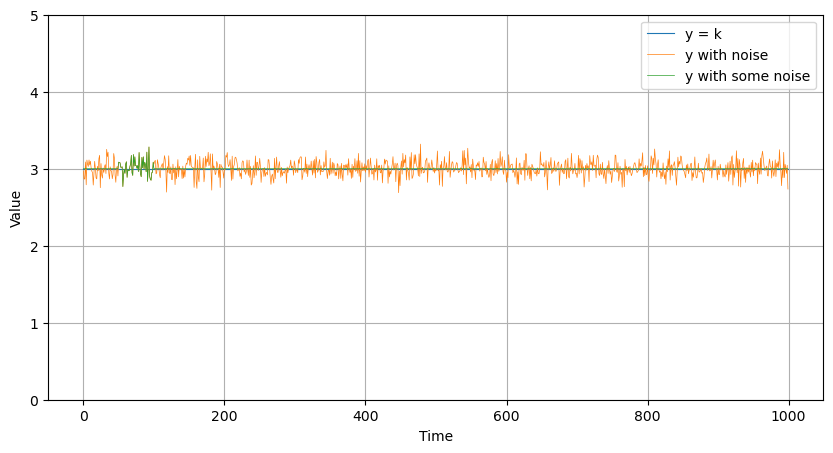

In [127]:
# Parameters
time_max = 1000
k = 3

time = np.arange(0, time_max, 1)
y = np.full_like(time, k, dtype=float)  # Constant value k for all time points
noise = np.random.normal(0, 0.1, size=time.shape)
y_noise = y + noise
start_idx = round(time_max / 20)
end_idx = round(time_max / 10)
y_not_so_noise = y.copy()
y_not_so_noise[start_idx:end_idx] += noise[start_idx:end_idx]

plt.figure(figsize=(10, 5))
plt.plot(time, y, label="y = k", linewidth=0.8)
plt.plot(time, y_noise, label="y with noise", linewidth=0.5)
plt.plot(time, y_not_so_noise, label="y with some noise", linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("Value")
plt.ylim(0, 5)
plt.legend()
plt.grid()
plt.show()

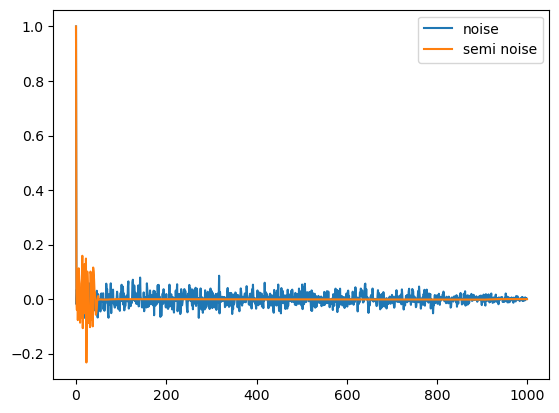

tau_noise = 0.023106839544962322
tau_semi noise = 0.041358374719486946


/tmp/ipykernel_1674111/1363613392.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-t / tau)


In [128]:
def exponential_decay(t, tau):
    return np.exp(-t / tau)

autocorr_constant = acf(y, nlags=time_max)
autocorr_noise = acf(y_noise, nlags=time_max)
autocorr_not_so = acf(y_not_so_noise, nlags=time_max)

#plt.plot(time, autocorr_constant) series of 1
plt.plot(time, autocorr_noise, label = "noise")
plt.plot(time, autocorr_not_so, label = "semi noise")
#plt.xlim(0, 100)
plt.legend()
plt.show()

time_lags = np.arange(time_max)
fit_noise, _  = curve_fit(exponential_decay, time_lags, autocorr_noise, p0=(10,))
tau_noise = fit_noise[0]
fit_not_so, _  = curve_fit(exponential_decay, time_lags, autocorr_not_so, p0=(10,))
tau_not_so = fit_not_so[0]

print(f"tau_noise = {tau_noise}")
print(f"tau_semi noise = {tau_not_so}")


